<a href="https://colab.research.google.com/github/VicenteSanMartinBustos/Detector_Fraude_TC/blob/main/Detector_Fraude_TC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Deteccion de fraudes con tarjeta de credito (Kaggle Dataset)***

## **Hecho por**: Vicente San Martín

##**Fecha**: 12/02/2026

# **Fase 1: Comprensión del negocio**
En este proyecto abordaremos un dataset de creditcard.csv, el cual contempla diversas variables sobre uso de tarjetas de creditos para la detección de posibles fraudes. Para esto usaremos la metodologia CRISP-DM, una de las mas usadas en el mundo laboral para organizar este tipo de proyectos.

Para empezar, importaremos todas las librerias necesarias o con posibilidad de uso en lo largo del proyecto, ya sea pandas, seaborn, scikit learn, etc.. (el peso de importe de estas librerias no es mayor, asi que no te preocupes por eso.)

In [1]:
#importamos todas las librerias posibles a usar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# al importar todo de un inicio, no tendremos que preocuparnos de futuras importaciones (en la mayoria de veces).

In [2]:
#cargaremos el dataset para visualizar con que estamos trabajando, el archivo creditcard.csv debe de estar en la raiz del proyecto para funcionar.
try:
  df = pd.read_csv('creditcard.csv')
  print("Archivo csv encontrado.")
except:
  print("No se encontró el archivo csv, por favor verifique ubicación.")

# PD: df significa 'dataframe' abreviado.


Archivo csv encontrado.


Una vez cargado estamos listos para adentrarnos en la fase 2 de la metodologia CRISP-DM.

# **Fase 2: Comprensión de los datos**
En esta fase veremos recopilaremos los datos que se usan, que tipo de datos son, si existen valores nulos y mas, incluyendo estadisticas descriptivas.

In [3]:
# vemos que tipos de datos son los que estamos trabajando.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Podemos observar que la gran cantidad de datos son tipo float64, es decir, que son decimales, mientras que la clase class es un int64, ya que incluia solamente 0 y 1, numeros enteros. Tambien algo super importante de mencionar es que todas las variables NO poseen valores nulos, y podemos ver aparte el memory usage, o uso de memoria que es 67,4MB lo cual es bastante aceptable.

In [4]:
# verificamos si existen valores nulos existentes (por si acaso).
nulos = df.isnull().sum().max()
print(f"valores nulos detectados: {nulos}")

valores nulos detectados: 0


In [5]:
# Ahora visualizaremos las filas y columnas, en este caso 5.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


¿Que observamos aquí?, tenemos cada una de las variables a trabajar, obviamente por temas de seguridad normalmente la mayoria de variables no se pueden deducir por si eres alguien externo (en este caso los v1 a v28 deben ser diferentes cosas importantes del banco/tarjeta de credito). A simple vista tenemos las variables importantes a trabajar, que serian Time, Amount y Class, siendo esta ultima la responsable de detectar los fraudes, tildados con un (1), los no fraudes con un (0).

In [6]:
# Contamos cuántos fraudes existen realmente vs transacciones normales
contar_clases = pd.value_counts(df['Class'], sort=True)
total = len(df)
fraude_porcentaje = (contar_clases[1] / total) * 100

print("--- Distribución de Clases ---")
print(f"Normal (0): {contar_clases[0]}")
print(f"Fraude (1): {contar_clases[1]}")
print(f"Tasa de Fraude: {fraude_porcentaje:.4f}%")

--- Distribución de Clases ---
Normal (0): 284315
Fraude (1): 492
Tasa de Fraude: 0.1727%


/tmp/ipython-input-122582789.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  contar_clases = pd.value_counts(df['Class'], sort=True)


Observamos que la diferencia entre transacciones normales y fraudes es abismal, siendo la tasa de fraude de 0.1727%, dato util ya que lo solucionaremos mas adelante.

In [7]:
# ahora veremos las estadisticas de estas variables.
print("--- Estadisticas Descriptivas ---")
print(df.describe())

--- Estadisticas Descriptivas ---
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1

Al ver mas a fondo las variables, podemos percatarnos de varias cosas. Primero que nada, la variable amount (una que si podemos interpretar $$$) tiene muchas diferencias, tiene un max de 25691, pero su promedio es de 88.34 y su mediana es de 22. Esto nos quiere decir que existen outliers extremos presentes en esta variable , que tiran el promedio hacia arriba. Tambien podemos ver que todas las variables "Vn" no pasan de un maximo alocado, siendo la mas alta la v3, finalmente class confirma ese porcentaje de 0.01727 o 0.17%.

Teniendo todo listo, pasaremos a la fase 3 de preparación de los datos, donde seleccionaremos, limpiaremos y construiremos nuevamente cada una de los datos necesarios.

# **Fase 3: Preparación de los datos**
aca modificaremos los datos necesarios para el continuo desarrollo del proyecto, veremos graficos incluidos.

Antes que todo, debemos de definir las variables x,y para el conjunto de entrenamiento y prueba.

In [8]:
from sklearn.model_selection import train_test_split

# separamos las variables (X) del objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# creamos los conjuntos de entrenamiento y prueba
# stratify=y mantiene el 0.17% de fraudes en ambos lados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"División completada.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

División completada.
X_train shape: (227845, 30)
X_test shape:  (56962, 30)


In [9]:
# importamos el robust scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# ajustamos y transformamos SOLO las columnas con problemas de escala

# Nota: V1-V28 ya vienen escaladas (PCA), asi que no se tocaran.

# Ajustamos (fit) solo con X_train para evitar "Data Leakage" (ver el futuro)
columnas_a_escalar = ['Amount', 'Time']

X_train[columnas_a_escalar] = scaler.fit_transform(X_train[columnas_a_escalar])
X_test[columnas_a_escalar] = scaler.transform(X_test[columnas_a_escalar])

#Verificación Final
print("Scaling completado con RobustScaler.")
print("\n--- Nuevas Estadísticas de 'Amount'---")
print(X_train['Amount'].describe())

Scaling completado con RobustScaler.

--- Nuevas Estadísticas de 'Amount'---
count    227845.000000
mean          0.921034
std           3.489528
min          -0.306193
25%          -0.227697
50%           0.000000
75%           0.772303
max         357.260404
Name: Amount, dtype: float64


Podemos observar ahora que las estadisticas de "Amount" han cambiado significativamente. Principalmente podemos ver que el max ahora es 357 de un max original de 25691. Tambien la mediana ahora es 0.00, quiere decir que ahora puede ajustarse a todos los Vn existentes sin que los valores extremos afecten el resultado.

Una vez arreglado esto, podemos seguir con el balanceo de datos. No podemos esperar que ese 0.17% de fraudes nos desvie de las predicciones, por eso usaremos SMOTE (Synthetic Minority Over-sampling Technique). SMOTE se usa basicamente para equilibrar conjunto de datos desequilibrados, como el % de fraudes y no fraudes es tan desigual, la idea es ajustar estos datos preferiblemente a 50/50. Cabe recalcar que para hacer estos datos similares, se usaran datos "sinteticos", la idea no es memorizar, es generalizar resultados.

In [10]:
# Importamos SMOTE
from imblearn.over_sampling import SMOTE

# Vamos a mostrar datos sin balanceo, para comparar.
print("--- Distribución de clases antes del balanceo ---")
print(y_train.value_counts())

# Instanciamos SMOTE
smote = SMOTE(random_state=42)

# Generamos fraudes "sinteticos" con SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificamos el resultado
print("--- Distribución de clases después del balanceo ---")
print(y_train_resampled.value_counts())

print(f"Dimensiones finales para entrenar: {X_train_resampled.shape}")

--- Distribución de clases antes del balanceo ---
Class
0    227451
1       394
Name: count, dtype: int64
--- Distribución de clases después del balanceo ---
Class
0    227451
1    227451
Name: count, dtype: int64
Dimensiones finales para entrenar: (454902, 30)


Ahora se puede observar que de class, 0 y 1 estan practicamente iguales (227451/227451) o 50/50. Con esto listo, podemos pasar al apartado de modelado, es decir, probar modelos predictivos para este caso. Si no hubieras hecho el balanceo, el resultado de las predicciones siempre se iria hacia 0, osea, no fraude.

# **Fase 4: Modelado**
En esta fase probaremos modelos predictivos para saber cual es mejor, veremos resultados diferentes en cada uno y cada metrica es importante al evaluar.

Por esto mismo, probaremos 3 modelos para tener opciones, estos son:
- Regresión logistica.
- Random Forest.
- XGboost.

Se explicara cada uno a medida que se muestre.

##***Regresión Logistica:***

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<Figure size 600x400 with 0 Axes>

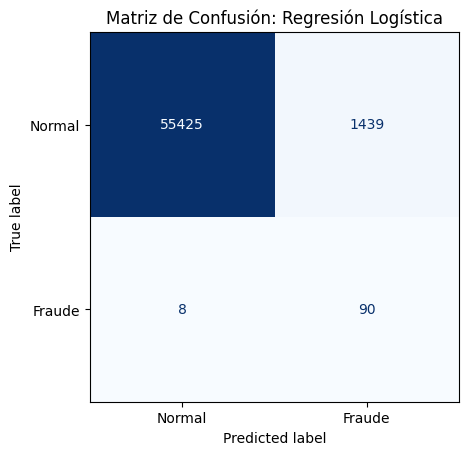

In [11]:
# Importamos el modelo de Regresión Logistica.
from sklearn.linear_model import LogisticRegression

# Tambien las respectivas metricas mas importantes.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importamos matplotlib
import matplotlib.pyplot as plt

# Instanciamos modelo, max_iter es para que el modelo encuentre la solución mas rapido.
log_reg = LogisticRegression(max_iter=1000,random_state=42)

# Entrenamos modelo con los datos balanceados de SMOTE.
log_reg.fit(X_train_resampled, y_train_resampled)

# Predecimos con los datos de prueba (Reales/Desbalanceados).
y_pred_log = log_reg.predict(X_test)

# Visualizamos el resultado
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_log))

# Visualizamos una matriz de confusión
plt.figure(figsize=(6, 4))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log,
    display_labels=["Normal", "Fraude"],
    cmap="Blues",
    colorbar=False
)

plt.title("Matriz de Confusión: Regresión Logística")
plt.grid(False)
plt.show()



El modelo de Regresíon Logistica es el mas basico de todos, ¿Que cosas importantes podemos observar?, tenemos un recall del 0.92 o 92%, esto quiere decir que el 92% de las veces el modelo acertara al encontrar los dichos fraudes, pero por otro lado, tiene un accuracy del 0.06 o 6%, es decir, que solo el 6% de alertas emitidas de que si son fraude, son reales. Por otro lado tenemos la matriz de confusión, esta muestra que se atraparon 90 fraudes reales, pero 8 se escaparon. Lo mas importante (y a mal) es que se detectaron 1439 falsos positivos, osea que eran casos en los que no era fraude, pero se detectaron como que si, sin duda alguna este modelo no podria ser una opción viable.

##***Random Forest:***

Entrenamiento completado en 103.29 segundos.
--- Reporte de Clasificación (Random Forest) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.88      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.77     56962
weighted avg       1.00      1.00      1.00     56962

--- Matriz de Confusión ---


<Figure size 600x400 with 0 Axes>

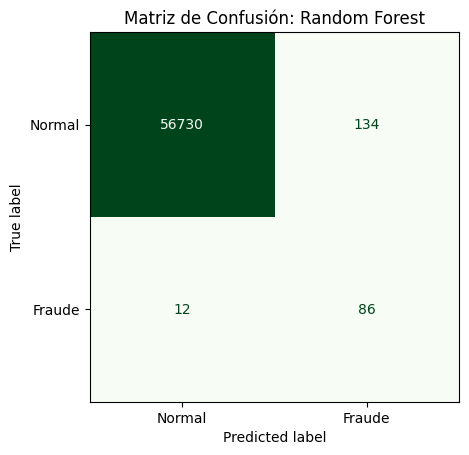

In [12]:
# Importamos el modelo de Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importamos metricas relevantes.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Importamos matplotlib.
import matplotlib.pyplot as plt
import time

# Instanciamos el modelo rf, n_estimators son el numero de arboles y n_jobs=-1 usa todos los nucleos CPU para mayor velocidad.
rf_model = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1)

start = time.time()
rf_model.fit(X_train_resampled, y_train_resampled)
end = time.time()

print(f"Entrenamiento completado en {end - start:.2f} segundos.")

# Predicción.
y_pred_rf = rf_model.predict(X_test)

# Visualizamos el reporte de clasificación.
print("--- Reporte de Clasificación (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

print("--- Matriz de Confusión ---")
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=["Normal", "Fraude"],
    cmap="Greens",
    colorbar=False
)
plt.title("Matriz de Confusión: Random Forest")
plt.grid(False)
plt.show()

Tenemos mejores resultados, Ahora las falsas alarmas son solo 134, es una bajada increible en comparación al modelo de regresión logistica. Podemos tambien observar unos cambios importantes, primero, tenemos un recall del 88% lo cual son 4% mas bajos que el 92% de regresión logistica, pero en cambio tenemos un aumento demencial en el apartado de accuracy, pasamos de un 6% a un 39%, tambien subio el F1-score a un 54%, en general es un modelo muy superior al anterior, pero se puede mejorar.

PD: Solo se puso 30 arboles para el testeo, se puede subir mas (por ejemplo a 100 arboles), pero se demoraria mas en cargar el resultado.

##***XGBoost:***

Entrenamiento completado en: 14.68 segundos.
--- Reporte de Clasificación (XGBoost) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

--- Matriz de Confusión ---


<Figure size 600x400 with 0 Axes>

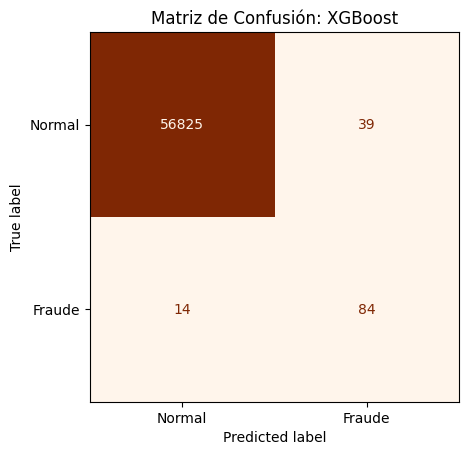

In [13]:
# Importamos modelo XGBoost.
from xgboost import XGBClassifier

# Importamos metricas necesarias.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Importamos matplotlib.
import matplotlib.pyplot as plt
import time

# Instanciamos el modelo, 100 arboles, maxima profundidad de 10, y n_jobs=-1 para poder usar la CPU al maximo
xgb_model = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=10,random_state=42,n_jobs=-1,eval_metric='logloss')

start = time.time()
xgb_model.fit(X_train_resampled, y_train_resampled)
end = time.time()

print(f"Entrenamiento completado en: {end - start:.2f} segundos.")

# Predicción.
y_pred_xgb = xgb_model.predict(X_test)

# Visualización del reporte.
print("--- Reporte de Clasificación (XGBoost) ---")
print(classification_report(y_test, y_pred_xgb))

# Visualización de matriz de confusión.
print("--- Matriz de Confusión ---")
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb,
    display_labels=["Normal", "Fraude"],
    cmap="Oranges",
    colorbar=False
)
plt.title("Matriz de Confusión: XGBoost")
plt.grid(False)
plt.show()


XGBoost dio unos resultados increibles, tiene un recall de 86% lo cual es aceptable tomando en cuenta que su precisión subio a un 68% y F1-score de 76%, ahora las falsas alarmas solo son 39, y atinó con 84 fraudes reales, es el mejor modelo entre todos.




# **Fase 5: Evaluación**
En este apartado veremos si el modelo escogido contempla lo necesario para implementarse, comparando resultados.


##***Tabla Comparativa de modelos:***

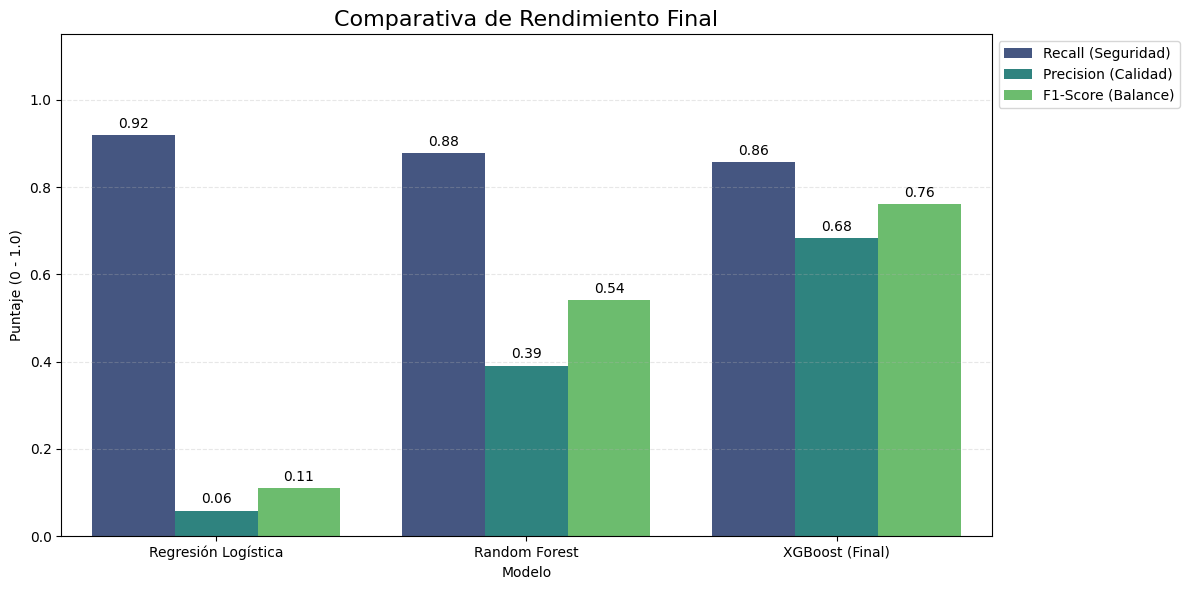

--- Tabla de resultados ---
                     Recall (Seguridad)  Precision (Calidad)  \
Modelo                                                         
Regresión Logística            0.918367             0.058862   
Random Forest                  0.877551             0.390909   
XGBoost (Final)                0.857143             0.682927   

                     F1-Score (Balance)  
Modelo                                   
Regresión Logística            0.110633  
Random Forest                  0.540881  
XGBoost (Final)                0.760181  


In [14]:
# Comparativa final de los modelos.

# Recopilamos los resultados actuales.
model_names = ['Regresión Logística', 'Random Forest', 'XGBoost (Final)']
models = [log_reg, rf_model, xgb_model] # Usamos los objetos reales.

metrics_list = []


for name, model in zip(model_names, models):

    preds = model.predict(X_test)

    metrics_list.append({
        'Modelo': name,
        'Recall (Seguridad)': recall_score(y_test, preds),
        'Precision (Calidad)': precision_score(y_test, preds),
        'F1-Score (Balance)': f1_score(y_test, preds)
    })

df_metrics = pd.DataFrame(metrics_list)

# Configuración del Gráfico.
plt.figure(figsize=(12, 6))

# Transformamos los datos para el gráfico.
df_melted = df_metrics.melt(id_vars="Modelo", var_name="Métrica", value_name="Puntaje")

# Barplot.
chart = sns.barplot(data=df_melted, x="Modelo", y="Puntaje", hue="Métrica", palette="viridis")

# Decoración para visualizar.
plt.title('Comparativa de Rendimiento Final', fontsize=16)
plt.ylim(0, 1.15)
plt.ylabel('Puntaje (0 - 1.0)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Etiquetas de valor.
for container in chart.containers:
    chart.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

# Mostramos resultados.
print("--- Tabla de resultados ---")
print(df_metrics.set_index('Modelo'))

Con este simple grafico comparativo tenemos terminada la fase 5, XGBoost responde mejor en todo, exceptuando unos puntos de recall nada urgente.

# **Fase 6: Despliegue**
Finalmente en esta ultima fase, veremos de que es capaz el modelo en un entorno de interfaz web, asi dando inicio al paso en acción del modelo XGBoost.

##***Impacto Financiero:***

In [15]:
# Impacto financiero.

# Recuperamos los Montos Originales ($) usando los índices del Test Set
# (Porque X_test tiene los montos escalados/modificados)
montos_reales = df.loc[X_test.index, 'Amount']

# Creamos un DataFrame con todo lo necesario para la auditoria.
resultados_financieros = pd.DataFrame({
    'Real': y_test,
    'Prediccion': y_pred_xgb, # Usamos las predicciones de XGBoost.
    'Monto': montos_reales
})

# Calculamos los escenarios posibles.
# Total de Fraude Disponible (Lo que perderíamos sin el modelo).
total_fraude_expuesto = resultados_financieros[resultados_financieros['Real'] == 1]['Monto'].sum()

# Fraude Detectado (Dinero Salvado).
# Es fraude (1) Y el modelo dijo fraude (1).
dinero_salvado = resultados_financieros[
    (resultados_financieros['Real'] == 1) & (resultados_financieros['Prediccion'] == 1)
]['Monto'].sum()

# Fraude No Detectado (Dinero Perdido).
dinero_perdido = resultados_financieros[
    (resultados_financieros['Real'] == 1) & (resultados_financieros['Prediccion'] == 0)
]['Monto'].sum()

# Costo de Falsas Alarmas (Operativo).
# No es fraude (0) PERO el modelo dijo fraude (1) -> Molestia al cliente.
# Asumimos costo administrativo de $5 USD por llamada (estimación variable).
num_falsos_positivos = resultados_financieros[
    (resultados_financieros['Real'] == 0) & (resultados_financieros['Prediccion'] == 1)
].shape[0]

costo_operativo = num_falsos_positivos * 5.0

# Reporte Ejecutivo.
print("--- REPORTE FINAL DE IMPACTO ---")
print(f"Total de Fraude en el Test Set:  ${total_fraude_expuesto:,.2f}")
print(f"---------------------------------------")
print(f" Dinero SALVADO por el Modelo: ${dinero_salvado:,.2f}")
print(f" Dinero PERDIDO (Fugas):       ${dinero_perdido:,.2f}")
print(f" Costo Operativo (Llamadas):   ${costo_operativo:,.2f} ({num_falsos_positivos} llamadas)")
print(f"---------------------------------------")
balance_final = dinero_salvado - costo_operativo
roi = (balance_final / total_fraude_expuesto) * 100
print(f" BALANCE NETO A FAVOR:        ${balance_final:,.2f}")
print(f" % del Fraude Recuperado:      {roi:.2f}%")

--- REPORTE FINAL DE IMPACTO ---
Total de Fraude en el Test Set:  $10,644.93
---------------------------------------
 Dinero SALVADO por el Modelo: $8,269.31
 Dinero PERDIDO (Fugas):       $2,375.62
 Costo Operativo (Llamadas):   $195.00 (39 llamadas)
---------------------------------------
 BALANCE NETO A FAVOR:        $8,074.31
 % del Fraude Recuperado:      75.85%


Aca podemos percatarnos de algo explicito, hicimos la prueba y el % recuperado es del 75.85%, lo cual es bastante acertado.

##***Grafico Referente:***

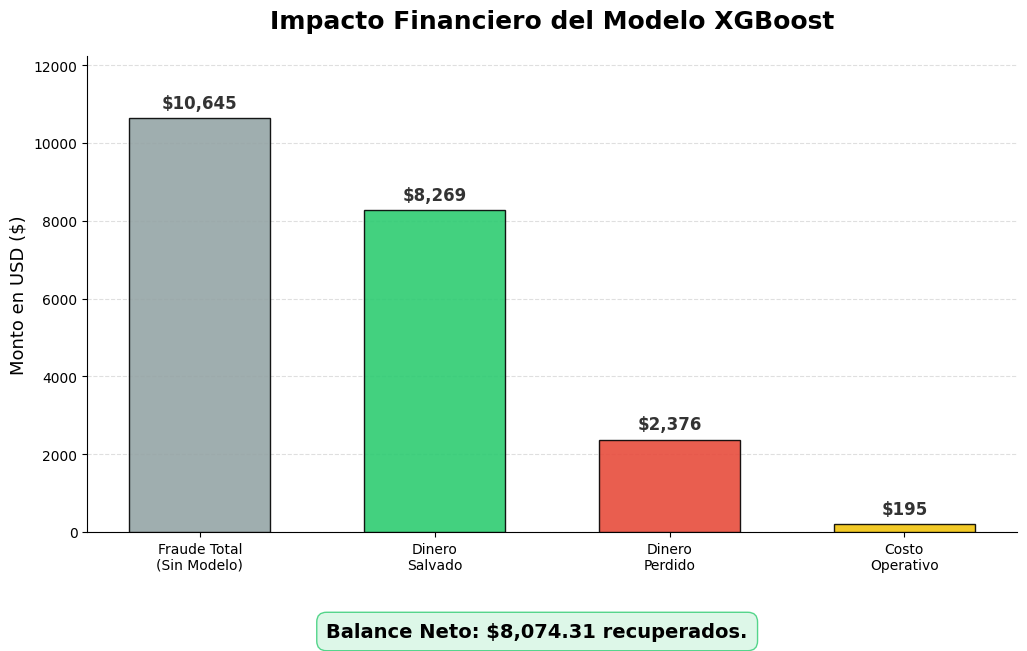

In [16]:

# Datos para el gráfico.
categorias = ['Fraude Total\n(Sin Modelo)', 'Dinero\nSalvado', 'Dinero\nPerdido', 'Costo\nOperativo']
valores = [total_fraude_expuesto, dinero_salvado, dinero_perdido, costo_operativo]
colores = ['#95a5a6', '#2ecc71', '#e74c3c', '#f1c40f']

# Aumentamos un poco el tamaño para mejor visualización.
plt.figure(figsize=(12, 7))

# Crear gráfico de barras.
bars = plt.bar(categorias, valores, color=colores, edgecolor='black', alpha=0.9, width=0.6, zorder=3)

# Títulos y formato.
plt.title('Impacto Financiero del Modelo XGBoost', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Monto en USD ($)', fontsize=13)

# rejillas suaves.
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Ajustamos el límite superior para que los textos no toquen el techo.
plt.ylim(0, max(valores) * 1.15)

# Poner los valores en dinero encima de las barras.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (max(valores)*0.015),
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='#333333')

# Ajustamos el margen inferior para reservar espacio a la nota.
plt.subplots_adjust(bottom=0.2)

# Nota al pie.
plt.figtext(0.5, 0.05, f"Balance Neto: ${balance_final:,.2f} recuperados.",
            ha="center", fontsize=14, fontweight='bold',
            bbox={"facecolor":"#d5f5e3", "edgecolor":"#2ecc71", "alpha":0.8, "pad":10, "boxstyle":"round,pad=0.5"})

plt.show()

Aqui se ve de manera mas visual, podemos observar tanto el fraude total, dinero salvado, dinero perdido y costo operativo estimado (no olvidar posibles variables a este precio).

##***Explicación grafica de variables y su repercusión:***

In [17]:
# Instalamos SHAP (nos permite ver de manera mas precisa las variables).
!pip install shap

--- Calculando SHAP en muestra reducida (200 filas) ---


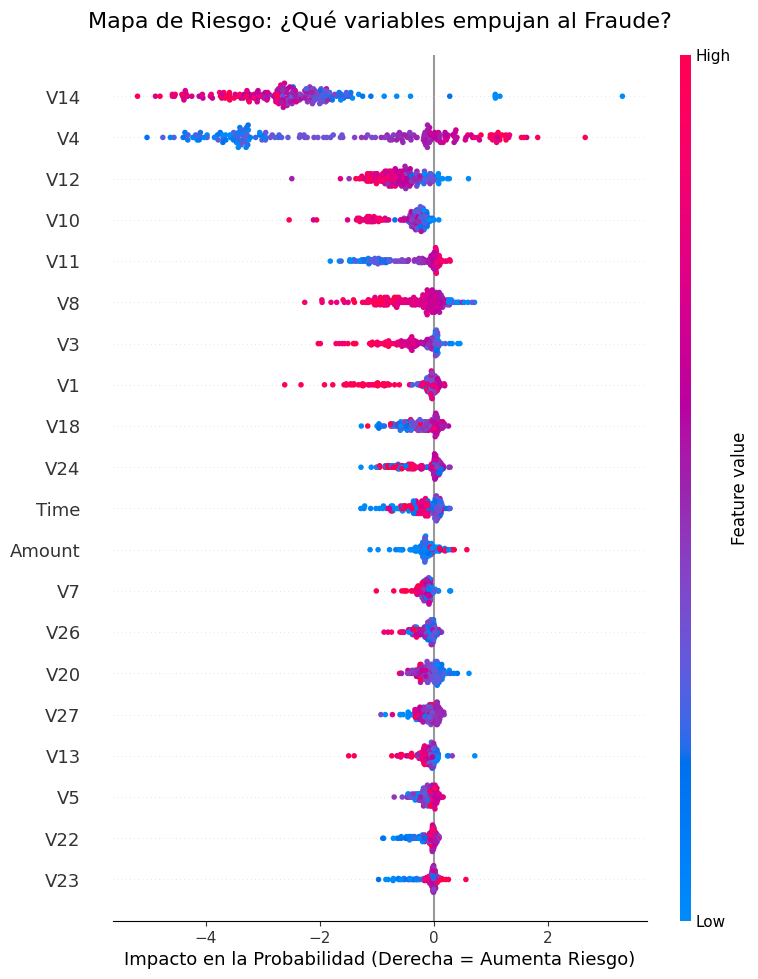

In [18]:
# importamos shap y matplotlib.
import shap
import matplotlib.pyplot as plt

# Tomamos una muestra aleatoria de 200 datos (Suficiente para ver patrones).
X_test_sample = X_test.sample(200, random_state=42)

print("--- Calculando SHAP en muestra reducida (200 filas) ---")

# Iniciamos el Explicador.
explainer = shap.TreeExplainer(xgb_model)

# Calculamos los valores SHAP solo para la muestra.
shap_values = explainer.shap_values(X_test_sample)

# Gráfico de enjambre.
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)

# Ajustes y definiciones.
plt.title('Mapa de Riesgo: ¿Qué variables empujan al Fraude?', fontsize=16, pad=20)
plt.xlabel('Impacto en la Probabilidad (Derecha = Aumenta Riesgo)')
plt.show()

Este grafico es oro, tenemos cada variable visible (No todas por espacio) y la explicación es la siguiente:
- **Variables**: Las variables estan ordenadas por orden de importancia, es decir, la mas importante seria v14 seguido de v4, v12, etc.

- **Divisor**: Hay una linea en eje horizontal, esta divido los valores graficos, si una variable esta mas tirada a la derecha significa que aumenta las probabilidades de ser fraude, y si esta a la izquierda, lo contrario.

- **Colores**: Los colores rojo y azul significan lo siguiente, El rojo es que la variable tiene un alto valor en deteccion real, y la azul es que tiene bajo valor en deteccion real.

##***Visualización de un caso de fraude exacto:***

--- Buscando un caso de fraude detectado... ---
 Analizando la transacción (Fila #840)
El modelo está 100% seguro de que esto es fraude. Veamos por qué.



<Figure size 2000x300 with 0 Axes>

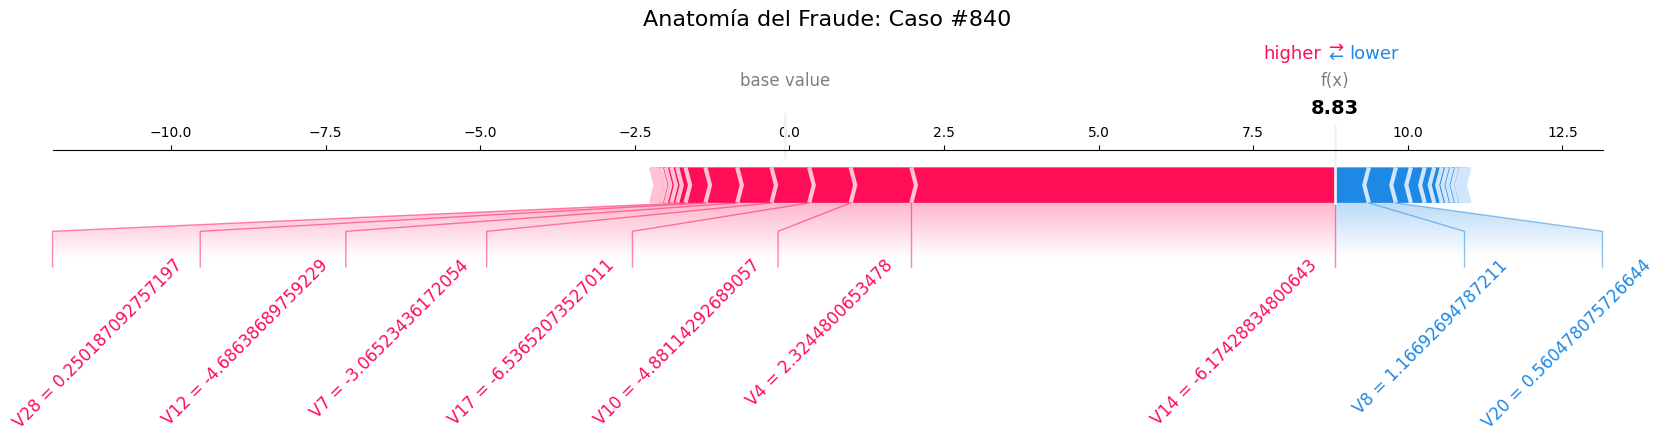


---Explicación:---
Variable V14 = -6.17 | EMPUJÓ HACIA FRAUDE (Rojo)
Variable V4 = 2.32 | EMPUJÓ HACIA FRAUDE (Rojo)
Variable V10 = -4.88 | EMPUJÓ HACIA FRAUDE (Rojo)


In [19]:
# Importamos shap, matplotlib y numpy.
import shap
import matplotlib.pyplot as plt
import numpy as np

# Necesitamos encontrar donde están los fraudes en el Test Set.
# Hacemos una predicción rápida sobre todo el test set.
print("--- Buscando un caso de fraude detectado... ---")
y_pred_temp = xgb_model.predict(X_test)

# Buscamos los índices donde:
# Realidad = 1 (Fraude) Y Predicción = 1 (Detectado).
# Esto nos da los "Aciertos" (True Positives).
indices_fraude = np.where((y_test == 1) & (y_pred_temp == 1))[0]

if len(indices_fraude) > 0:
    # Tomamos el primer caso que encontramos.
    idx_elegido = indices_fraude[0]

    # Obtenemos los datos de esa fila específica.
    # .iloc[[idx]] mantiene el formato DataFrame (necesario para SHAP).
    fila_fraude = X_test.iloc[[idx_elegido]]

    print(f" Analizando la transacción (Fila #{idx_elegido})")
    print("El modelo está 100% seguro de que esto es fraude. Veamos por qué.\n")

    # Calculamos SHAP solo para esta fila (Instantáneo).
    explainer = shap.TreeExplainer(xgb_model)
    shap_values_single = explainer.shap_values(fila_fraude)

    # Generamos el Force Plot (Gráfico de Fuerzas).
    # matplotlib=True genera una imagen estática que no falla en Colab.
    plt.figure(figsize=(20, 3))
    shap.force_plot(
        explainer.expected_value,    # Valor base (promedio).
        shap_values_single[0],       # Los empujones de este caso.
        fila_fraude,                 # Los valores reales.
        matplotlib=True,
        show=False,
        text_rotation=45
    )
    plt.title(f'Anatomía del Fraude: Caso #{idx_elegido}', fontsize=16, y=1.5)
    plt.show()

    # Traducción a Texto.
    print("\n---Explicación:---")
    # Ordenamos las variables por impacto absoluto.
    indices_top = np.argsort(np.abs(shap_values_single[0]))[::-1][:3] # Top 3.

    for i in indices_top:
        nombre_var = X_test.columns[i]
        valor_real = fila_fraude.iloc[0, i]
        impacto = shap_values_single[0][i]

        accion = "EMPUJÓ HACIA FRAUDE (Rojo)" if impacto > 0 else "EMPUJÓ HACIA NORMAL (Azul)"
        print(f"Variable {nombre_var} = {valor_real:.2f} | {accion}")

else:
    print("No se encontraron fraudes detectados en el X_test actual (¿Quizás el modelo no predijo ninguno?)")

Esta anatomía se ve confusa pero es facil de interpretar. Tenemos una linea base (base value situado en 0.0), y tenemos nuevamente los colores rojos y azules, siendo rojos los que interpretan el caso como un fraude, y siendo azules los que interpretan el caso como normal. Ambos estan "tirando" en dirección contraria, pero se puede observar que las variables mas decisivas van hacia la derecha, osea hacia determinar el caso como fraude.

##***Detección de fraudes de manera aleatoria:***

In [22]:
# Importamos todo lo necesario (random para aleatorio y Ipython para interfaz mas visual).
import time
import random
import pandas as pd
import numpy as np
from IPython.display import display, clear_output, HTML

# Configuración Realista simulando comercios, ubicaciones y bancos (Metadatos Falsos visuales).
# El modelo usa las matemáticas (V1-V28), pero se muestra esto para que se vea real.
comercios = ['Amazon Prime', 'Uber Rides', 'Starbucks', 'Apple Store', 'Netflix', 'Gasolinera Shell', 'Walmart', 'Target', 'Steam Games', 'Spotify']
ubicaciones = ['New York, US', 'London, UK', 'Tokyo, JP', 'Santiago, CL', 'Madrid, ES', 'IP: 192.168.x.x (VPN)', 'Sao Paulo, BR']
bancos = ['Chase', 'Santander', 'BBVA', 'Bank of America', 'Scotiabank']

# Contadores globales para la sesión.
total_analizado = 0
fraudes_bloqueados = 0
dinero_salvado = 0.0

# Preparamos la data (Mezcla de Fraudes y Normales del Test Set).
pool_fraudes = X_test[y_test == 1].sample(10, replace=True) # Tomamos 10 fraudes reales.
pool_normales = X_test[y_test == 0].sample(20)              # Tomamos 20 normales.
pool_mixto = pd.concat([pool_fraudes, pool_normales]).sample(frac=1).reset_index(drop=True)

# El Bucle de Simulación Visual (simulando 15 transacciones).
for i in range(15):
    # Pausa aleatoria para ir leyendo un poco.
    time.sleep(random.uniform(0.8, 2.5))

    # Procesamiento.
    tx = pool_mixto.iloc[[i]]
    probabilidad = xgb_model.predict_proba(tx)[0][1] # Probabilidad real del modelo.
    es_fraude = probabilidad > 0.5

    # Datos esteticos para la visualización.
    comercio = random.choice(comercios)
    ubicacion = random.choice(ubicaciones)
    banco = random.choice(bancos)
    tarjeta = f"**** **** **** {random.randint(1000,9999)}"
    monto_visual = round(abs(tx['Amount'].values[0] * 100) + random.randint(10, 50), 2)

    # Actualización de contadores.
    total_analizado += 1
    if es_fraude:
        fraudes_bloqueados += 1
        dinero_salvado += monto_visual
        status_color = "#e74c3c" # Rojo.
        status_text = "BLOQUEADO"
        icon = "🚨"
        risk_width = f"{int(probabilidad*100)}%"
    else:
        status_color = "#2ecc71" # Verde.
        status_text = "APROBADO"
        icon = "✅"
        risk_width = f"{int(probabilidad*100)}%"

    # Se crea el dashboard con html y css.
    clear_output(wait=True) # Limpia la pantalla para crear efecto video.

    dashboard_html = f"""
    <div style="font-family: monospace; background-color: #1e1e1e; color: white; padding: 20px; border-radius: 10px; width: 600px; border: 2px solid #333;">
        <h2 style="margin-top: 0; color: #3498db; border-bottom: 1px solid #555; padding-bottom: 10px;">
            Detector de fraude TC <span style="font-size: 0.6em; color: #777;">Tiempo real.</span>
        </h2>

        <div style="display: flex; justify-content: space-between; margin-bottom: 20px;">
            <div style="text-align: center;">
                <div style="font-size: 0.8em; color: #aaa;">ANALIZADAS</div>
                <div style="font-size: 1.5em; font-weight: bold;">{total_analizado}</div>
            </div>
            <div style="text-align: center;">
                <div style="font-size: 0.8em; color: #e74c3c;">AMENAZAS</div>
                <div style="font-size: 1.5em; font-weight: bold; color: #e74c3c;">{fraudes_bloqueados}</div>
            </div>
            <div style="text-align: center;">
                <div style="font-size: 0.8em; color: #2ecc71;">$$ SALVADO</div>
                <div style="font-size: 1.5em; font-weight: bold; color: #2ecc71;">${dinero_salvado:,.2f}</div>
            </div>
        </div>

        <div style="background-color: #2c2c2c; padding: 15px; border-radius: 5px; border-left: 5px solid {status_color};">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <span style="font-size: 1.2em; font-weight: bold;">{comercio}</span>
                <span style="font-size: 1.2em;">${monto_visual}</span>
            </div>
            <div style="color: #aaa; margin-top: 5px;">
                💳 {tarjeta} | 🏦 {banco} | 📍 {ubicacion}
            </div>

            <hr style="border: 0; border-top: 1px solid #444; margin: 15px 0;">

            <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 5px;">
                <span>Nivel de Riesgo IA:</span>
                <span style="font-weight: bold; color: {status_color};">{probabilidad:.2%}</span>
            </div>

            <div style="background-color: #444; height: 10px; border-radius: 5px; width: 100%;">
                <div style="background-color: {status_color}; height: 100%; border-radius: 5px; width: {risk_width}; transition: width 0.5s;"></div>
            </div>

            <div style="margin-top: 15px; text-align: center; font-size: 1.5em; font-weight: bold; color: {status_color}; border: 1px solid {status_color}; padding: 5px; border-radius: 5px;">
                {icon} {status_text}
            </div>
        </div>
        <div style="text-align: center; margin-top: 10px; color: #555; font-size: 0.8em;">
            Procesando flujo de datos en tiempo real... ID: {random.randint(100000, 999999)}
        </div>
    </div>
    """
    display(HTML(dashboard_html))

print("Sesión terminada con exito.")

Sesión terminada con exito.


Finalmente, en este ultimo caso se usaron datos random para la implementación, aqui la explicación:
- Se testeo con 15 transacciones al azar en tiempo real, de esas transacciones se puede observar al costado cuantas de ellas fueron detectadas como amenazas, dependiendo de la ejecución y resultado que se obtenga, podra ver el dinero salvado sumado. (datos como comercio, ubicación y banco son totalmente ficticios para la demostración, pero si se tuviera información directa entre sus correlaciones, seria mucho mas preciso el modelo).

# **Conclusión General:**
El detector de fraudes en tarjetas de credito se centró en resolver uno de los problemas mas criticos que se enfrentan dia a dia en el sector financiero, los mismos fraudes. Al empezar con un desbalanceo extremo de 0.17% de fraudes, el objetivo no solamente era predecir algo, tambien tenian que ser en igualdad de condiciones para no afectar las pruebas de modelado a futuro. se descartaron nulos, se vieron variables importantes y apliqué tecnicas como RobustScaler y SMOTE, que fueron sin duda esenciales para el avance. En cuanto al modelo final, XGBoost fue sin duda la opción acertada, ya que a diferencia de Random Forest, en XGBoost los n_estimators aprenden en base a los errores de sus mismas pruebas pasadas, es por eso que funcionó tan bien, y sin mostrar overfitting, con un buen recall,f1-score y accuracy. Las pruebas fueron precisas: Impacto financiero (Dinero tangible), importancia de variables (Valor explicativo) y procesos aleatorios (Realismo puro), haciendo la comprensión de todo esto con ayuda de graficos, SHAP, y uso de html y css al final para una visión mas atractiva.

